### Growing Iris trees: Simple example of decision-tree classification

Based on *Introduction to Machine Learning with Python*, Ch2


In [5]:
import graphviz        # If you have trouble using graphviz, try using *both* conda install and pip install
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier


#### To visualize the data more easily, we'll use just use two dimensions, petal length and petal width.

Text(0.5, 1.0, '\n\nFull petal data set\n\n')

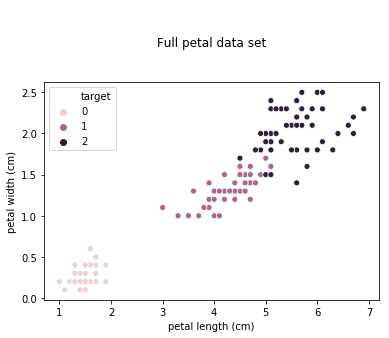

In [6]:
r = load_iris()
raw = pd.DataFrame(r['data'])
raw.columns = r['feature_names']
raw['target'] = pd.Series(r['target']) 
petals=raw.loc[:,['petal length (cm)','petal width (cm)','target']]
sns.scatterplot(x=petals['petal length (cm)'],y=petals['petal width (cm)'], hue=petals['target']).set_title('\n\nFull petal data set\n\n')

#### Create random training and test sets from the full dataset, using 2/3 of the dataset to train and 1/3 to test:

Text(0.5, 1.0, '\n\nTraining data\n\n')

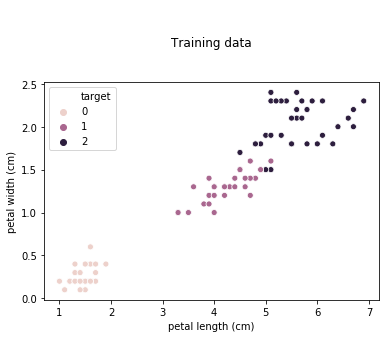

In [7]:
data_train, data_test, target_train, target_test = train_test_split(
                                    petals[['petal length (cm)' ,'petal width (cm)']]
                                    ,petals['target']  
                                    ,stratify=petals['target']
                                    ,test_size = 0.33
                                    ,random_state = 0)

sns.scatterplot(x=data_train['petal length (cm)'],y=data_train['petal width (cm)'],hue=target_train).set_title('\n\nTraining data\n\n')

Text(0.5, 1.0, '\n\nTest data\n\n')

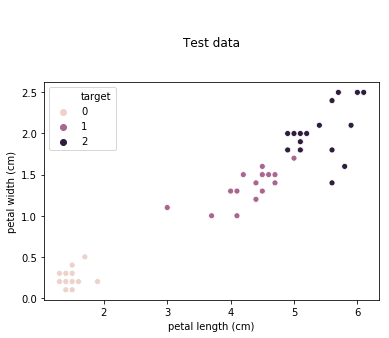

In [8]:
sns.scatterplot(x=data_test['petal length (cm)'],y=data_test['petal width (cm)'],hue=target_test).set_title('\n\nTest data\n\n')

#### Create a decision tree classifier:
If we allow the tree to grow as complex as possible (no regularization), we can see that it develops several layers and displays a modest amount of overfitting (the training score is higher than the test score).

In [9]:
iris_tree = DecisionTreeClassifier(random_state=0)
iris_tree.fit(data_train,target_train)
test_score = iris_tree.score(data_test,target_test)
training_score = iris_tree.score(data_train,target_train)
print(f"training score: {training_score}, Test score: {test_score}")

training score: 0.99, Test score: 0.96


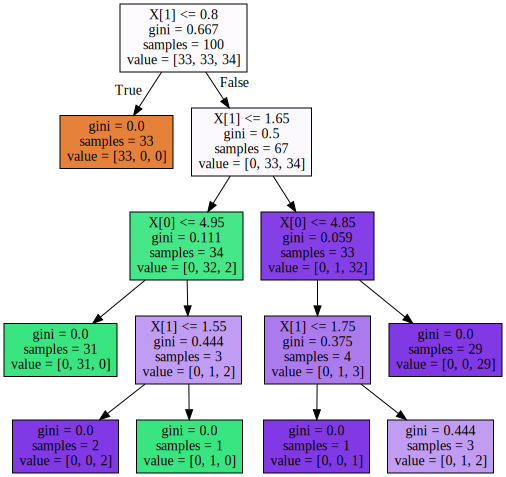

In [10]:
export_graphviz(iris_tree,out_file = 'iris_tree.dot',filled=True)
with open('iris_tree.dot') as f:
    iris_tree_graph = f.read()
# iris_tree_graph[:200] # Here's the top of the dot file, not too hard to read
graphviz.Source(iris_tree_graph)

Now with some regularization, restricting the depth of the tree to 3 layers.  There's a modest decrease in overfitting.

Training score: 0.98, Test score: 0.98


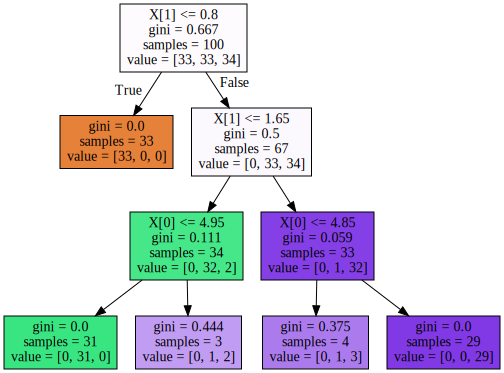

In [11]:
iris_tree = DecisionTreeClassifier(random_state=0,max_depth=3)
iris_tree.fit(data_train,target_train)
test_score = iris_tree.score(data_test,target_test)
training_score = iris_tree.score(data_train,target_train)
export_graphviz(iris_tree,out_file = 'iris_tree.dot',filled=True)
with open('iris_tree.dot') as f:
    iris_tree_graph = f.read()
print(f"Training score: {training_score}, Test score: {test_score}")
graphviz.Source(iris_tree_graph)

In [13]:
iris_tree.feature_importances_

array([0.04497754, 0.95502246])

#### Make a random forest classifier

In [26]:
iris_tree_forest = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=3)
iris_tree_forest.fit(data_train,target_train)
test_score = iris_tree_forest.score(data_test,target_test)
training_score = iris_tree_forest.score(data_train,target_train)
print(f"Training score: {training_score}, Test score: {test_score}")


Training score: 0.98, Test score: 0.98


### Further questions we might want to ask:
1. What's the best way to visualize exactly how the space of possible features (petal length and width) is divided by our model among the three iris species?
2. Did we just get lucky - what does the distribution of test scores look like for a large number of random divisions between training and test data?
3. What's the best way to choose the optimum tree depth?
4. How does the model compare with the k-nearest neighbors model?